In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy.linalg import inv
from PIL import Image, ImageDraw
import matplotlib.patches as patches

In [30]:
def shift_mask(mask):
    M = mask.shape[0]
    N = mask.shape[1]
    new_mask = np.zeros(shape=(mask.shape[0],mask.shape[1]))
    if(M!=N or M%2 == 0):
        print("Invalid Mask supplied")
        return mask
    else:
        center = int(M/2)
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                new_mask[i,j] = mask[2*center - i , 2*center - j]
        return new_mask

In [31]:
def myconv2d(img,mask,median=False):
    mask = shift_mask(mask)
    M = mask.shape[0]
    N = mask.shape[1]
    offset_row = int(M/2)
    offset_col = int(N/2)
    new_img = np.zeros(shape=(img.shape[0]+M,img.shape[1] + N),dtype=np.integer)
    new_img[M-1 : -1,N-1 : -1] = img
    new_conv_img = np.zeros(shape=(img.shape[0],img.shape[1] ))
    for i in range(new_conv_img.shape[0]):
        for j in range(new_conv_img.shape[1]):
            if(median):
                new_conv_img[i,j] = int(np.median(new_img[i:i+M , j:j+N]))
            else:
                #print(new_img[i:i+M , j:j+N])
                #print(i,j,i+M,j+N)
                new_conv_img[i,j] = abs(int(np.sum(mask * new_img[i:i+M , j:j+N])))
                if new_conv_img[i,j] >= 255:
                    new_conv_img[i,j] = 255
                
    
    return new_conv_img
    #return(img * mask)

In [32]:
def img_subtract(img1 , img2):
    new_img = np.zeros(shape=(img1.shape[0],img1.shape[1]))
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            new_img[i,j] = abs(img1[i,j] - img2[i,j])
    return new_img


Original Image


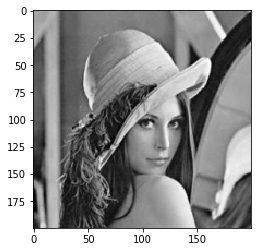

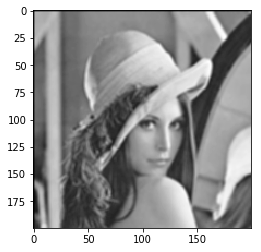

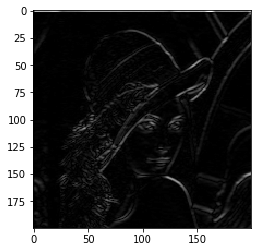

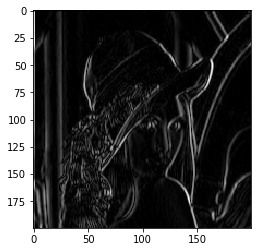

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]] [[ 0.02777778  0.11111111  0.02777778]
 [ 0.11111111  0.44444444  0.11111111]
 [ 0.02777778  0.11111111  0.02777778]]


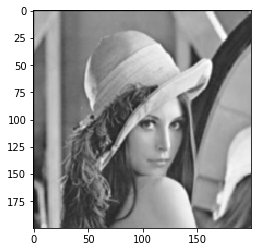

[[ 0.16666667  0.16666667  0.16666667]
 [ 0.          0.          0.        ]
 [-0.16666667 -0.16666667 -0.16666667]] [[ 0.08333333  0.33333333  0.08333333]
 [ 0.          0.          0.        ]
 [-0.08333333 -0.33333333 -0.08333333]]


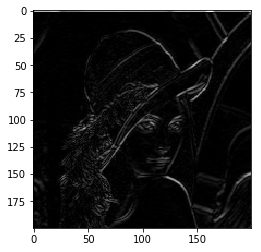

[[ 0.16666667  0.         -0.16666667]
 [ 0.16666667  0.         -0.16666667]
 [ 0.16666667  0.         -0.16666667]] [[ 0.08333333  0.         -0.08333333]
 [ 0.33333333  0.         -0.33333333]
 [ 0.08333333  0.         -0.08333333]]


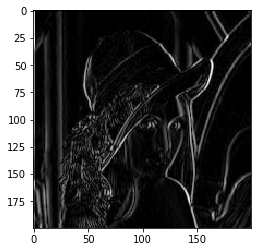

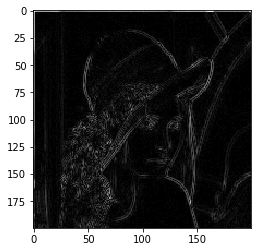

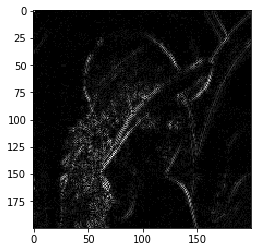

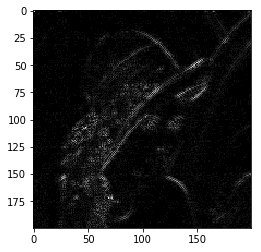

-0.206875


In [92]:
img = misc.imread('lena.jpg',mode="L")
print("Original Image")
plt.imshow(img)
plt.gray()
plt.show()
#Constructing X as row-major order
X = np.array([[1 , -1 , -1],[1 , -1 , 0] , [1 , -1 , 1] , [1 , 0 , -1] , [1 , 0 , 0] , [1 , 0 , 1] , [1 , 1 , -1] , [1 , 1 , 0] , [1 , 1 , 1]])
beta_m = np.dot(inv(np.dot(X.T,X)) , X.T)
#beta_m is the solution to the problem Q2(a) which gives beta(min) matrix
#Now calculating three masks by taking row major order and shifting with reference of origin
mask1 = shift_mask(beta_m[0].reshape(3 , 3))
mask2 = shift_mask(beta_m[1].reshape(3 , 3))
mask3 = shift_mask(beta_m[2].reshape(3 , 3))
img1 = myconv2d(img,mask1)
img2 = myconv2d(img,mask2)
img3 = myconv2d(img,mask3)
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()
#For Question2 (c). Adding noise in X(beta)
#Defining Weight matrices for noise in image capturing device
W = np.zeros(shape=(9,9))
W[0][0] = 1
W[1][1] = 2
W[2][2] = 1
W[3][3] = 2
W[4][4] = 4
W[5][5] = 2
W[6][6] = 1
W[7][7] = 2
W[8][8] = 1

#k1 = inv(np.dot((np.dot(X.T,W.T)),W))
beta_m1 = np.dot(inv(np.dot((np.dot(X.T,W.T)),np.dot(W,X))),np.dot(np.dot(X.T,W.T),W))
mask4 = shift_mask(beta_m1[0].reshape(3 , 3))
mask5 = shift_mask(beta_m1[1].reshape(3 , 3))
mask6 = shift_mask(beta_m1[2].reshape(3 , 3))
img4 = myconv2d(img,mask4)
img5 = myconv2d(img,mask5)
img6 = myconv2d(img,mask6)
#Ploting all images
plt.figure()
print(mask1,mask4)
#plt.subplot(1,2,1)
#plt.imshow(img1)
#plt.subplot(1,2,2)
plt.imshow(img4)
plt.show()
plt.figure()
print(mask2,mask5)
#plt.subplot(1,2,1)
#plt.imshow(img2)
#plt.subplot(1,2,2)
plt.imshow(img5)
plt.show()
plt.figure()
print(mask3,mask6)
#plt.subplot(1,2,1)
#plt.imshow(img3)
#plt.subplot(1,2,2)
plt.imshow(img6)
plt.show()

plt.imshow(img_subtract(img1,img4))
plt.show()
plt.imshow(img_subtract(img2,img5))
plt.show()
plt.imshow(img_subtract(img3,img6))
plt.show()

In [93]:
def myconv2d_and(img,mask):
    M = mask.shape[0]
    N = mask.shape[1]
    offset_row = int(M/2)
    offset_col = int(N/2)
    new_img = np.zeros(shape=(img.shape[0]+M,img.shape[1] + N),dtype=np.integer)
    new_img[M-1 : -1,N-1 : -1] = img
    new_conv_img = np.zeros(shape=(img.shape[0],img.shape[1] ),dtype=np.float)
    mask_mean = np.mean(mask)
    mask_norm = (np.sum(np.square(mask - mask_mean)))**0.5
    for i in range(new_conv_img.shape[0]):
        for j in range(new_conv_img.shape[1]):

            img_mean = np.mean(new_img[i:i+M , j:j+N])
            img_norm = (np.sum(np.square(new_img[i:i+M , j:j+N] - img_mean)))**0.5
            if(img_norm != 0):
                new_conv_img[i,j] = ((np.sum((mask - mask_mean) * (new_img[i:i+M , j:j+N] - img_mean)))/(mask_norm*img_norm))
            else:
                new_conv_img[i,j] = 0
                
    return (new_conv_img)

In [ ]:
img1 = misc.imread('lab4text.png',mode="L")
img1 = img1 + 15
img2 = misc.imread('and.png',mode="L")
img2 = img2 + 15
result = myconv2d_and(img1,img2)
plt.imshow(result)
plt.show()
max1 = np.max(result)
print(max1)
ma_i = []
for i in range(img2.shape[0],result.shape[0]-1):
    for j in range(img2.shape[1],result.shape[1]-1):
        if(result[i,j] >= max1):
            ma_i.append((i,j))
print(len(ma_i))
im = Image.open('lab4text.png')
draw = ImageDraw.Draw(im)
for i in range(int(len(ma_i))):
    #rect = (patches.Rectangle((ma_i[i][0],ma_i[i][1]+img2.shape[1]),img2.shape[1],img2.shape[0],linewidth=1,edgecolor='r',facecolor='none'))
    draw.rectangle([ma_i[i][1]-img2.shape[1], ma_i[i][0]-img2.shape[0],ma_i[i][1] ,ma_i[i][0] ], outline=(200, 0, 100, 255))
im.show()